In [51]:
#Clustering Code Here

In [137]:
import pandas as pd 
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
!pip install -U kaleido
import kaleido
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [138]:
data_1 = pd.read_csv("/Users/vancedimmick/Downloads/general_data.csv")
data_2 = pd.read_csv("/Users/vancedimmick/Downloads/hr_dashboard_data.csv")

In [139]:
#data_1: "Attrition in a Company" kaggle dataset had more entries (rows) than did data_2
# Therefore, we reduced the number of observations in data_1 to 200 via random sample
Sample_data_1 = data_1.sample(n=200, replace=True, random_state=42)
Sample_data_1 = Sample_data_1.drop("EmployeeID", axis=1)
Sample_data_1 = Sample_data_1.drop("PerformanceRating", axis=1)

In [140]:
Sample_data_1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
860,26,No,Travel_Rarely,Research & Development,4,3,Life Sciences,1,Male,1,...,0,1.00,6,1,0,0,1.00,4.00,3.00,3
3772,29,No,Travel_Rarely,Research & Development,1,3,Medical,1,Female,1,...,0,9.00,5,7,0,7,3.00,1.00,3.00,4
3092,30,No,Travel_Rarely,Sales,25,3,Marketing,1,Male,1,...,1,11.00,5,5,0,2,3.00,4.00,3.00,3
466,24,No,Travel_Rarely,Sales,28,3,Life Sciences,1,Female,1,...,1,5.00,3,4,3,2,4.00,3.00,3.00,3
3444,26,Yes,Travel_Frequently,Sales,2,3,Life Sciences,1,Male,2,...,2,6.00,2,3,1,2,1.00,1.00,3.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3170,42,No,Travel_Rarely,Research & Development,28,4,Life Sciences,1,Female,2,...,0,10.00,5,10,2,2,3.00,4.00,3.00,3
1682,24,No,Travel_Frequently,Sales,22,3,Life Sciences,1,Female,1,...,2,3.00,5,2,2,1,4.00,4.00,3.00,2
2255,53,No,Travel_Rarely,Research & Development,2,4,Technical Degree,1,Male,2,...,0,35.00,2,9,8,8,4.00,2.00,2.00,3
1154,30,No,Travel_Rarely,Human Resources,20,4,Life Sciences,1,Male,2,...,0,12.00,3,12,1,7,4.00,2.00,2.00,2


In [141]:
# Dropping the duplicate columns contained in both data from data_2, prioritizing those from data_1 due to
# its newly updated, random sample status
data_2 = data_2.drop("Age", axis=1)
data_2 = data_2.drop("Name", axis=1)
data_2 = data_2.drop("Gender", axis=1)

In [142]:
data_2

,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,11,57,25,4.70,Marketing,Analyst,20-Jan,63596
1,19,55,76,2.80,IT,Manager,Jan-99,112540
2,8,87,10,2.40,IT,Analyst,17-Jan,66292
3,1,53,4,1.40,Marketing,Intern,22-Jan,38303
4,14,3,9,4.50,IT,Team Lead,5-Jan,101133
...,...,...,...,...,...,...,...,...
195,9,32,87,3.50,HR,Junior Developer,19-Jan,50051
196,7,45,28,2.80,IT,Junior Developer,21-Jan,46612
197,3,36,77,1.60,Finance,Intern,21-Jan,32992
198,23,96,50,3.40,Marketing,Manager,5-Jan,104216


In [143]:
# Create a common 'ID' column in both DataFrames in order to merge them
data_2["ID"]= range(1, len(data_2)+1)
Sample_data_1["ID"]= range(1, len(Sample_data_1)+1)
data_2

,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary,ID
0,11,57,25,4.70,Marketing,Analyst,20-Jan,63596,1
1,19,55,76,2.80,IT,Manager,Jan-99,112540,2
2,8,87,10,2.40,IT,Analyst,17-Jan,66292,3
3,1,53,4,1.40,Marketing,Intern,22-Jan,38303,4
4,14,3,9,4.50,IT,Team Lead,5-Jan,101133,5
...,...,...,...,...,...,...,...,...,...
195,9,32,87,3.50,HR,Junior Developer,19-Jan,50051,196
196,7,45,28,2.80,IT,Junior Developer,21-Jan,46612,197
197,3,36,77,1.60,Finance,Intern,21-Jan,32992,198
198,23,96,50,3.40,Marketing,Manager,5-Jan,104216,199


In [144]:
merged_data = pd.merge(data_2, Sample_data_1, on='ID'); merged_data

,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department_x,Position,Joining Date,Salary,ID,Age,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,11,57,25,4.70,Marketing,Analyst,20-Jan,63596,1,26,...,0,1.00,6,1,0,0,1.00,4.00,3.00,3
1,19,55,76,2.80,IT,Manager,Jan-99,112540,2,29,...,0,9.00,5,7,0,7,3.00,1.00,3.00,4
2,8,87,10,2.40,IT,Analyst,17-Jan,66292,3,30,...,1,11.00,5,5,0,2,3.00,4.00,3.00,3
3,1,53,4,1.40,Marketing,Intern,22-Jan,38303,4,24,...,1,5.00,3,4,3,2,4.00,3.00,3.00,3
4,14,3,9,4.50,IT,Team Lead,5-Jan,101133,5,26,...,2,6.00,2,3,1,2,1.00,1.00,3.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9,32,87,3.50,HR,Junior Developer,19-Jan,50051,196,42,...,0,10.00,5,10,2,2,3.00,4.00,3.00,3
196,7,45,28,2.80,IT,Junior Developer,21-Jan,46612,197,24,...,2,3.00,5,2,2,1,4.00,4.00,3.00,2
197,3,36,77,1.60,Finance,Intern,21-Jan,32992,198,53,...,0,35.00,2,9,8,8,4.00,2.00,2.00,3
198,23,96,50,3.40,Marketing,Manager,5-Jan,104216,199,30,...,0,12.00,3,12,1,7,4.00,2.00,2.00,2


In [145]:
merged_data = merged_data.drop("ID", axis=1)


In [146]:
merged_data.columns

Index(['Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)',
       'Feedback Score', 'Department_x', 'Position', 'Joining Date', 'Salary',
       'Age', 'Attrition', 'BusinessTravel', 'Department_y',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement'],
      dtype='object')

In [147]:
len(merged_data.columns)

35

In [148]:
# Dropping categorical columns for the unhelpfulness in a clustering model
merged_data = merged_data.select_dtypes(exclude=['object'])

In [149]:
len(merged_data.columns)

24

In [163]:
merged_data

,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Salary,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,11,57,25,4.70,63596,26,4,3,1,1,...,0,1.00,6,1,0,0,1.00,4.00,3.00,3
1,19,55,76,2.80,112540,29,1,3,1,1,...,0,9.00,5,7,0,7,3.00,1.00,3.00,4
2,8,87,10,2.40,66292,30,25,3,1,1,...,1,11.00,5,5,0,2,3.00,4.00,3.00,3
3,1,53,4,1.40,38303,24,28,3,1,1,...,1,5.00,3,4,3,2,4.00,3.00,3.00,3
4,14,3,9,4.50,101133,26,2,3,1,2,...,2,6.00,2,3,1,2,1.00,1.00,3.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,9,32,87,3.50,50051,42,28,4,1,2,...,0,10.00,5,10,2,2,3.00,4.00,3.00,3
196,7,45,28,2.80,46612,24,22,3,1,1,...,2,3.00,5,2,2,1,4.00,4.00,3.00,2
197,3,36,77,1.60,32992,53,2,4,1,2,...,0,35.00,2,9,8,8,4.00,2.00,2.00,3
198,23,96,50,3.40,104216,30,20,4,1,2,...,0,12.00,3,12,1,7,4.00,2.00,2.00,2


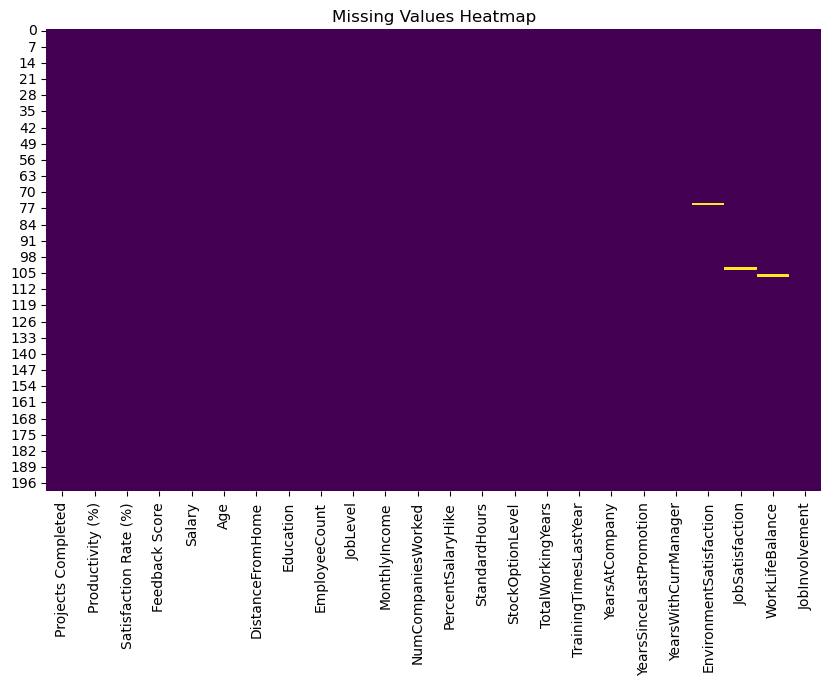

In [165]:

# Identifying the presence of na or naN values in the dataset
plt.figure(figsize=(10,6))
sns.heatmap(merged_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [166]:
# Dropping these null values to complete Clustering model
merged_data.dropna(inplace=True);
total_nan = merged_data.isnull().sum().sum()
print(f"Total number of NaN values: {total_nan}")

Total number of NaN values: 0


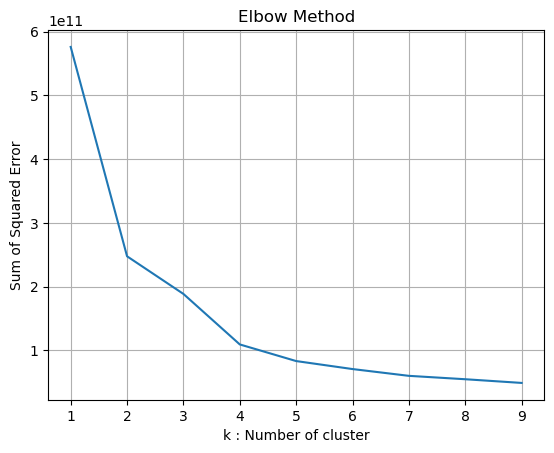

In [169]:
#Elbow method
sse = {};sil = [];kmax = 10

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(merged_data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

In [171]:
merged_data.columns

Index(['Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)',
       'Feedback Score', 'Salary', 'Age', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement'],
      dtype='object')

In [173]:
column_names = ['Projects Completed', 'Productivity (%)', 'Satisfaction Rate (%)',
       'Feedback Score', 'Salary', 'Age', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement']


In [175]:
merged_data_df = pd.DataFrame(merged_data, columns=column_names)

In [177]:
# silhouette score evaluation of Clustering models
#A score closer to 1 means that the clusters are well-separated and compact.
#A score close to 0 indicates that the clusters are not well-defined or are overlapping.
#A negative score suggests that some points might have been assigned to the wrong cluster.

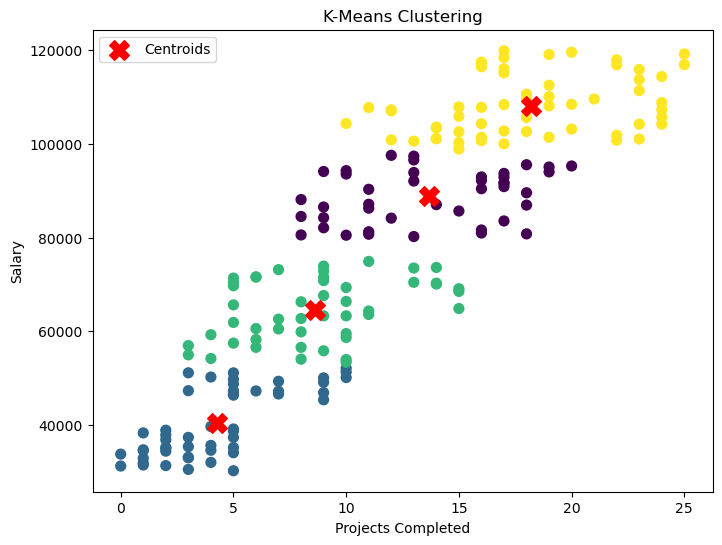

Silhouette Score: 0.5878064086134991


In [179]:
# Choose the features for clustering
X = merged_data[['Projects Completed', 'Salary']] 

# Fit the KMeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X['Projects Completed'], X['Salary'], c=labels, cmap='viridis', s=50)

# Plot the centers
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centroids')

# Create the legend for clusters
# Define custom labels for the clusters
# Create a legend with the cluster labels
cluster_labels = [f'Cluster {i}' for i in range(4)]
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(i/4),
markersize=10) for i in range(4)],labels=cluster_labels, title="Clusters")

# Customize the plot
plt.title('K-Means Clustering')
plt.xlabel('Projects Completed')
plt.ylabel('Salary')
plt.legend()
plt.show()

sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")

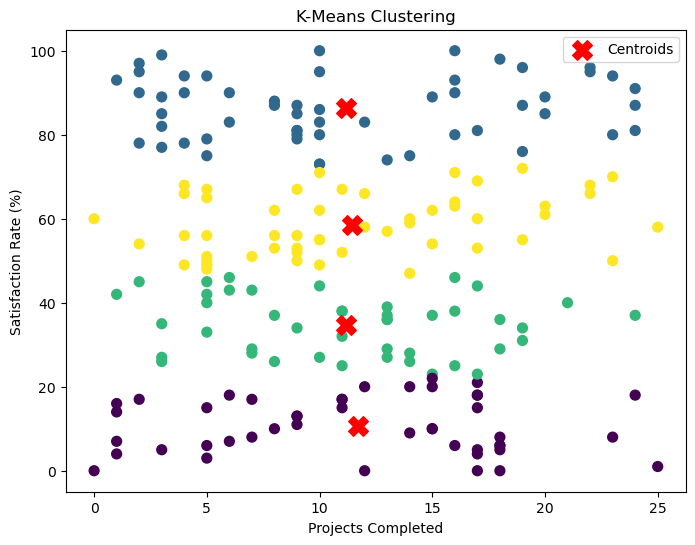

Silhouette Score: -0.05405965558639975


In [181]:
# Choose the features for clustering
Y = merged_data[['Projects Completed', 'Satisfaction Rate (%)']] 

# Fit the KMeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(Y)

# Get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(Y['Projects Completed'], Y['Satisfaction Rate (%)'], c=labels, cmap='viridis', s=50)

# Plot the centers
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centroids')

# Customize the plot
plt.title('K-Means Clustering')
plt.xlabel('Projects Completed')
plt.ylabel('Satisfaction Rate (%)')
plt.legend()
plt.show()

sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")

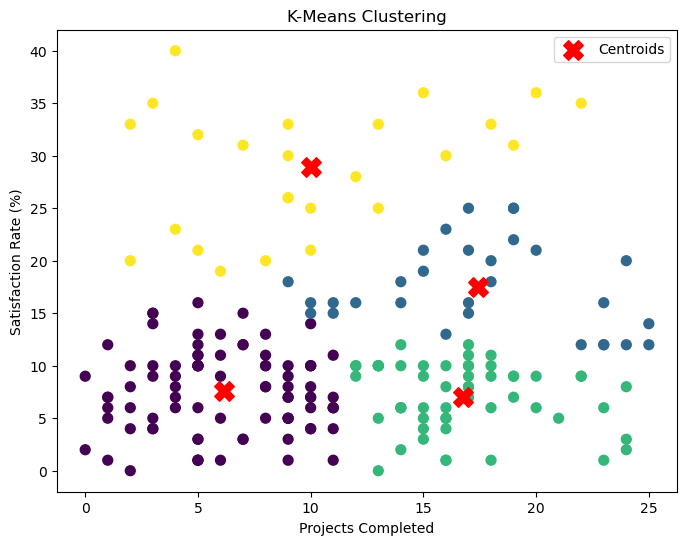

Silhouette Score: 0.025078394835782555


In [183]:
# Choose the features for clustering
Z = merged_data[['Projects Completed', 'TotalWorkingYears']] 

# Fit the KMeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(Z)

# Get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(Z['Projects Completed'], Z['TotalWorkingYears'], c=labels, cmap='viridis', s=50)

# Plot the centers
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X', label='Centroids')

# Customize the plot
plt.title('K-Means Clustering')
plt.xlabel('Projects Completed')
plt.ylabel('Satisfaction Rate (%)')
plt.legend()
plt.show()

sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")